# Titanic Data Analysis  
Paulo Black  




Below is a statistical analysis I have created using the numpy and pandas Python packages to invesitgate the relationships between several different variables describing the passengers on board the Titanic. The data has been downloaded from https://www.kaggle.com/c/titanic/data, a data competition based on creating a predictive model for survival of the passengers. Rather than go in depth purely into the statistics regarding survival, I have chosen to examine the relationships between Sex, Age and survival and the relationships between Sex, Fare and Class.

Immediately below you will find the code I used to create the functions I called throughout the analysis in order to compare the dependent and independent variables I chose to analyze. Below this first block of code is the full statistical invesigation. I have tried to keep my functions relatively scalable except where I ran across significant difficulty with the hopes that if I (or anyone else) chooses to use this code to perform a more in depth analysis of any particular variables, or include any that I have not, it will be a straightforward addition that will not require much editing of the functions.

In [38]:
import pandas as pd
import numpy as np
import math
%pylab inline
import matplotlib.pyplot as plt
path = r'~/Desktop/iPython/P2_Data/titanic_data.csv'
data = pd.read_csv(path)

#Group by an entry and then examine statistics of another variable relative to that entry
def grouper(df,entry1=None,entry2=None,entry3=None):
    #This gives us our group if we are using discrete samples
    if entry2 != None:
        discrete = df.groupby([entry1,entry2])
        discretesum = discrete.sum()
    #This checks to see if there is a third entry. If so, it produces 
    if entry3 != None:
        #Checks the statistics of entry3 in entry1
        stats2var = df.groupby(entry1).describe()[entry3]
        #Checks the statistics of entry3 within the grouping of entries 1 and 2
        if entry2 != None:
            stats3var = discrete.describe()[entry3]
    #These return statements are nested so that no variables are returned that were not created
            return discretesum, stats2var, stats3var 
        return discretesum, stats2var
    return discretesum


#This function is used to create plots for the analysis of survival
def survplot(df,entry,bins,totbins):
    survgroup = df.groupby(['Survived'])
    figure(1)
    subplot(211)
    plt.hist(survgroup[entry].get_group(1)[~np.isnan(survgroup[entry].get_group(1))],bins)
    plt.title('(Top) Survivors and (Bot) Deceased')
    plt.ylabel("Survivors")
    plt.xlabel(entry)
    subplot(212)
    plt.hist(survgroup[entry].get_group(0)[~np.isnan(survgroup[entry].get_group(0))],bins)
    plt.ylabel("Deceased")
    plt.xlabel(entry)
    plt.show()
    figure(2)
    totgroup = df[entry]
    totplot = totgroup.hist(bins = totbins)
    plt.title('Total')
    totplot.plot()
    return

#Function to create plots that compare the survival dependent upon two values
def multivarplot(df,entry1,entry2,entry3,bins,name1 = None, name2 = None, name3 = None,tit1 = None,tit2 = None,tit3 = None):
    plotgroup = df.groupby([entry1,entry2])
    series = plotgroup[entry3]
    val = 0
    subval = 0
    #Loop to output plots
    for key in series:
        figure(val)
        key = key[1][~np.isnan(key[1])]
        plt.hist(key,bins)
        
        if val <= 1:
            
            if subval == 0:
                plt.ylabel(name1)
                subval += 1
            elif subval == 1:
                plt.ylabel(name2)
                subval = 0       
            plt.title(tit1)
        elif val <= 3:
            if subval == 0:
                plt.ylabel(name1)
                subval += 1
            elif subval == 1:
                plt.ylabel(name2)
                subval = 0
            plt.title(tit2)
        elif val <= 5:
            if subval == 0:
                plt.ylabel(name1)
                subval += 1
            elif subval == 1:
                plt.ylabel(name2)
                subval = 0
            plt.title(tit3)
        plt.xlabel(name3)
        val += 1
        
    
    pass
    

#Function to create pie plots for discrete variables
def discreteplot(df,entry1,entry2,indexvals = None):
    discvar = df.groupby([entry1,entry2])
    series = discvar.count()
    
    #Get the series for total count, dead, and alive. I used embarked count to count the number of men and women on board as there
    #Were no missing values for embarked
    totplot = df.groupby(entry2).count()[entry1]
    liveplot = series['Embarked'][0]
    deadplot = series['Embarked'][1]
    #Print pie plots
    figure(1)
    totplot.plot.pie(labels = indexvals, colors=['r', 'g', 'b', ],autopct='%.2f', fontsize=20, figsize=(6, 6),title = 'Total')
    figure(2)
    liveplot.plot.pie(labels = indexvals, colors=['r', 'g', 'b', ],autopct='%.2f', fontsize=20, figsize=(6, 6),title = 'Deceased')
    figure(3)
    deadplot.plot.pie(labels = indexvals, colors=['r', 'g', 'b', ],autopct='%.2f', fontsize=20, figsize=(6, 6),title = 'Survived')
    
    return

def ttest(df,entry):
    totstats = df[entry].describe()
    survgroup = df.groupby('Survived')
    live_stats = survgroup[entry].describe()[1]
    dead_stats = survgroup[entry].describe()[0]
    #Find Standard Deviations of populations
    std_live = math.sqrt((((survgroup[entry].get_group(1) - totstats[1])**2).sum())/(live_stats[0]-1))
    std_dead = math.sqrt((((survgroup[entry].get_group(0) - totstats[1])**2).sum())/(dead_stats[0]-1))
    #Find T values of each
    t_live = (live_stats[1] - totstats[1])/(std_live/math.sqrt(live_stats[0]))
    t_dead = (dead_stats[1] - totstats[1])/(std_dead/math.sqrt(dead_stats[0]))
    #Find Cohen's D for each
    live_Cohen_d = (survgroup[entry].mean()[1] - totstats[1])/std_live
    dead_Cohen_d = (survgroup[entry].mean()[0] - totstats[1])/std_dead
    
    return totstats, live_stats, dead_stats, t_live, t_dead, live_Cohen_d, dead_Cohen_d


Populating the interactive namespace from numpy and matplotlib


First we'll examine the relationship between age and survival.  
Let's look at histograms that show the distribution of ages amongs the surviving group and the deceased group at the top and the total ages at the bottom.

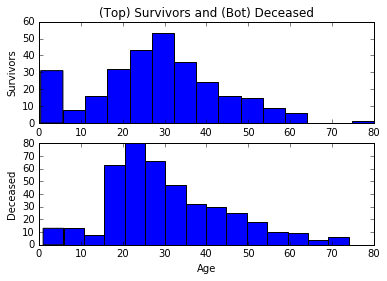

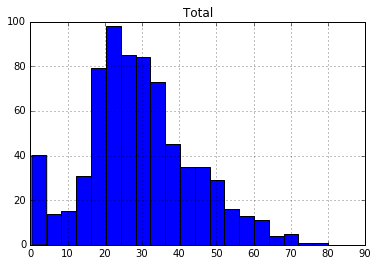

In [96]:
survplot(data,'Age',15,20)

Interestingly, we see that a lot of children younger than 5 survived. Of the total 891 passengers aboard, the age is only reported for 714 passengers. I've decided to simply neglect the missing values. It would be possible to create a model to interpolate the missing values, but for this report I think that would be excessive. I have chosen to ignore all NaN (missing values) throughout the analysis, as values are only missing for reported ages. For a thorough predictive analysis, it would be important to understand if there was a particular demographic whose ages were consistently not reported, but as this goes beyond the scope of this study, I have chosen to neglect them.

Now let's start by looking at the basic statistical summary of the ages in the two groups.

In [9]:
survagesex = grouper(data,'Survived','Sex','Age')
survagesex[1]

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

So there were 424 deceased and 290 survivors. We also see the effect of our spike in surviving children, even though the central peak in the surviors histogram is older than in the deceased histogram, the survivors mean is lower than the deceased histogram. The standard deviations are about the same in both. I'll do an intelligent T-test to deal with this.

In [199]:
aget = ttest(data,'Age')
print 'The T-Value for age of survivors is:', aget[3]
print 'The T-Value for age of deceased is:', aget[4]
print 'Cohens D for age of survivors is:', aget[5]
print 'Cohens D for age of deceased is:', aget[6]


The T-Value for age of survivors is: -1.537528073
The T-Value for age of deceased is: 1.34408773652
Cohens D for age of survivors is: -0.0902867572536
Cohens D for age of deceased is: 0.0652746708124


One sample two tailed T-Test showed that for survivors t(289) = -1.54 Two Tail, p = .1253, statistically insignificant  
One sample two tailed T-Test showed that for deceased t(423) = 1.34 Two Tail, p = .1810, statistically insignificant   
In both cases we fail to reject the Null Hypothesis.

Of importance is the fact that I did not truncate the outlier values that skew significantly toward the young in the data for surviving passengers. Considering how close the T-Value for survivors is to the first T-Critical value, I would more rigorously examine these T-Tests if the goal were to create a predictive model for survival based on age.

Now that we understand the relationship between age and survival, let's look at the relationship between sex and survival, then we can look at the relationship between all three. Below is a pie plot showing the total distribution of sex on board, then the distribution amongst deceased and finally survivors. The titles on the side are just the values I used to calculate number. Embarked was convenient for the latter two as there are no missing values.

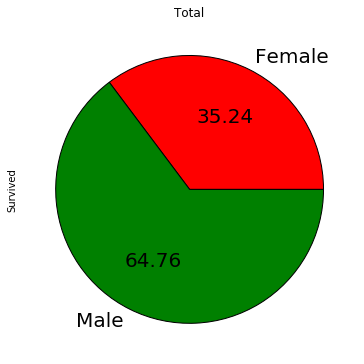

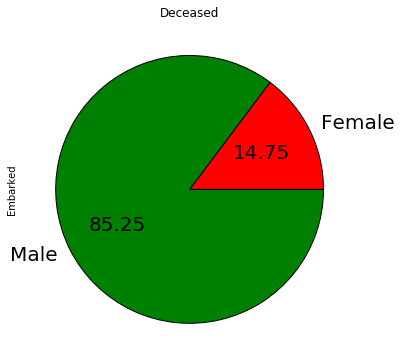

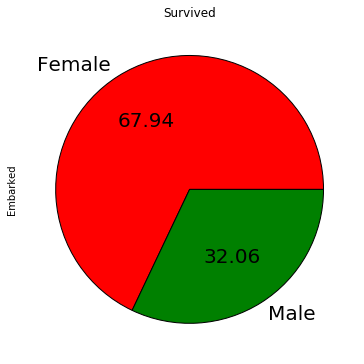

In [7]:
discreteplot(data,'Survived','Sex',['Female','Male'])


We see that there were many more men on board than women, there was a much higher survival rate amongst women.

So then, did the differences in survival between sexes depend on age as well?

In [131]:
survagesex[2]



Survived  Sex          
0         female  count     64.000000
                  mean      25.046875
                  std       13.618591
                  min        2.000000
                  25%       16.750000
                  50%       24.500000
                  75%       33.250000
                  max       57.000000
          male    count    360.000000
                  mean      31.618056
                  std       14.056019
                  min        1.000000
                  25%       21.750000
                  50%       29.000000
                  75%       39.250000
                  max       74.000000
1         female  count    197.000000
                  mean      28.847716
                  std       14.175073
                  min        0.750000
                  25%       19.000000
                  50%       28.000000
                  75%       38.000000
                  max       63.000000
          male    count     93.000000
                  mean    

We can better understand these results if we see them plotted out. Below are histograms in the following order: deceased women, deceased men, surviving women, surviving men.

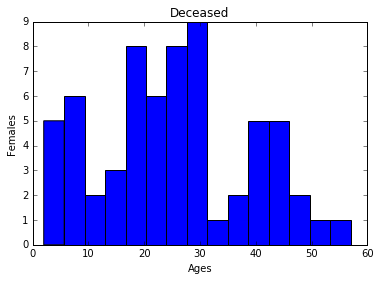

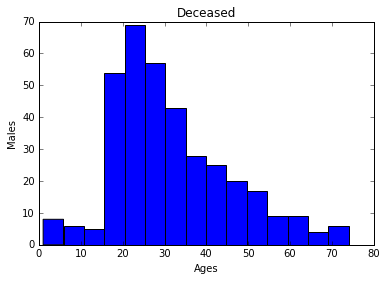

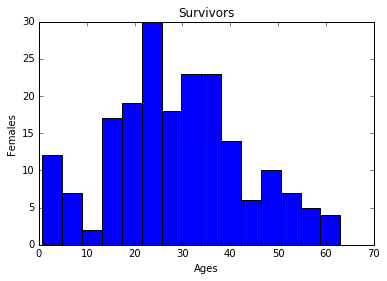

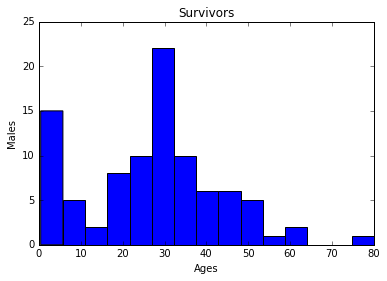

In [22]:
multivarplot(data,'Survived','Sex','Age',15,'Females','Males','Ages','Deceased','Survivors')

We can see that of the deceased, the men were older and the women younger than in the surviving group, where the mean ages are comparable. We also see the two outlier spikes on the far left for both men and women in the surviving groups. Interestingly, the histogram for the deceased women is a balanced normal distribution, whereas for the men it is skewed to the right. By interpreting these simultaneously with the means and total counts of each group we see that the phrase "women and children first," applied heavily in the sinking of the Titanic. 

Now we'll look at the relationships between class, sex and fare. First we see a summary of what the fares were for each class. 

In [13]:
classfareage = grouper(data,'Pclass','Sex','Fare')
classfareage[1]

Pclass       
1       count    216.000000
        mean      84.154687
        std       78.380373
        min        0.000000
        25%       30.923950
        50%       60.287500
        75%       93.500000
        max      512.329200
2       count    184.000000
        mean      20.662183
        std       13.417399
        min        0.000000
        25%       13.000000
        50%       14.250000
        75%       26.000000
        max       73.500000
3       count    491.000000
        mean      13.675550
        std       11.778142
        min        0.000000
        25%        7.750000
        50%        8.050000
        75%       15.500000
        max       69.550000
Name: Fare, dtype: float64

So some obvious interesting statistics. The mean fare for first class was 84.15, for second it was 20.66, and for third it was 13.67. I thought it was interesting that second class had the lowest total number of passengers even though it was only a few dollars more than third class. I would infer from this that whatever benefits second class got above third was not worth the couple dollars more a passenger would've spent. Just like in modern airplanes!

Next we can look at some histograms that compares the class distribution for females and males by fare. The first two histograms are for First, the second two for Second and the last two for Third. All histograms have the sex considered on the Y Axis as the count of individuals. Interestingly, in first class, it seems the men got away with paying a lot less than the ladies did. In second class, it looks like the opposite is true. In third everyone clumps pretty tightly around 15 or so dollars, except for the unlucky chumps on the right side that forked over upwards of 40 dollars to drown in the flotsam with the rest of the crowd. These unlucky chumps, like most, seem to be predominantly male.

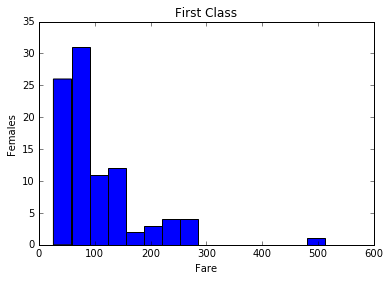

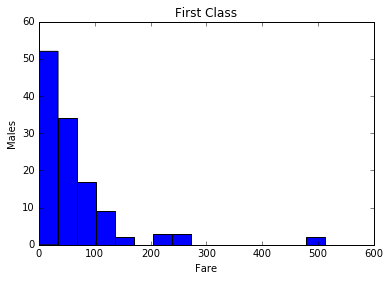

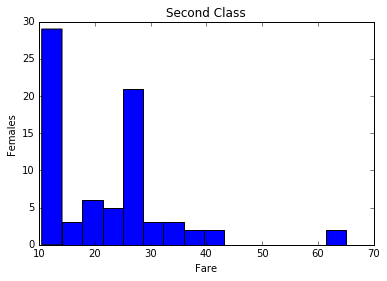

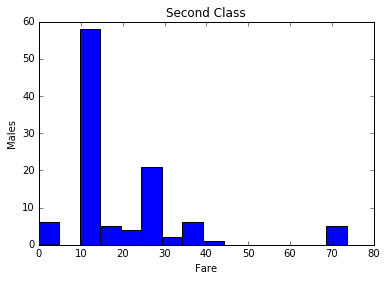

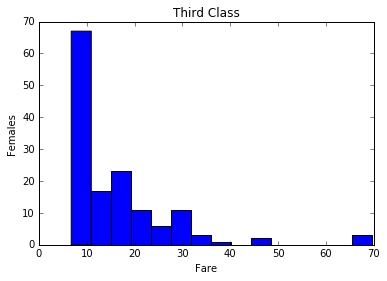

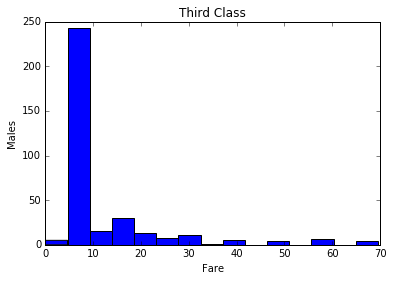

In [24]:
multivarplot(data,'Pclass','Sex','Fare',15,'Females','Males','Fare','First Class','Second Class','Third Class')

So let's take a quick peak at the numerical description of these plots

In [23]:
classfareage[2]

Pclass  Sex          
1       female  count     94.000000
                mean     106.125798
                std       74.259988
                min       25.929200
                25%       57.244800
                50%       82.664550
                75%      134.500000
                max      512.329200
        male    count    122.000000
                mean      67.226127
                std       77.548021
                min        0.000000
                25%       27.728100
                50%       41.262500
                75%       78.459375
                max      512.329200
2       female  count     76.000000
                mean      21.970121
                std       10.891796
                min       10.500000
                25%       13.000000
                50%       22.000000
                75%       26.062500
                max       65.000000
        male    count    108.000000
                mean      19.741782
                std       14.922235
      

So these numbers confirm some of our observations from before. The mean fare for women in first class is just shy of 40 dollars more than for men. We know from earlier that there were 64% men and 36% women on board, and we saw that many more women than men survived. Let's do some quick and easy arithmetic to see what these ratios look like for the classes.

In [37]:
ttot = 347 + 144
stot = 108 + 76
ftot = 122 + 94
print 'Men in third', 347./ttot
print 'Men in second', 108./stot
print 'Men in first', 122./ftot

Men in third 0.706720977597
Men in second 0.586956521739
Men in first 0.564814814815


Okay, men made up 71% of third class, 59% percent of second class and 56% of third, implying women were 29% of third, 41% of second and 44% of third. At first glance these seem pretty close to the overall distribution of sex, but a more in depth analysis could reveal interesting deviations. I don't think that this would be very fruitful however, as predicting the class of a passenger whose class is not given does not seem a worthwhile endeavor.

From these statistics we have a thorough understanding of the relationships between age, sex and survival as well as class, sex and fare. For the Kaggle competition, more thorough analysis could be conducted to get a better picture of exactly how influential other independent variables such as number of siblings and parents, class, etc. were on the survival rates. We could also more rigorously conduct our T-test by removing outlier values and interpolating the missing ages, as well as conducting some more T-test for the other variables. For the purpose of this exercise, I believe it has been more informative to analyze the relationships between more dependent variables than just survival with less depth than it would have been to restrict the analysis to just survival and investigate with more rigor. It would be interesting to return at a later date equipped with some machine learning techniques in order to create a thorough predictive model of passenger survival.